<a href="https://colab.research.google.com/github/sreesanthrnair/My_Activity/blob/main/Classification_algorithm_Sreesanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
wine_quality=pd.read_csv('/content/winequality-red.csv')


In [3]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_quality.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
wine_quality.duplicated().sum()

np.int64(240)

In [7]:
wine_quality.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine_quality.duplicated().sum()


np.int64(240)

In [9]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

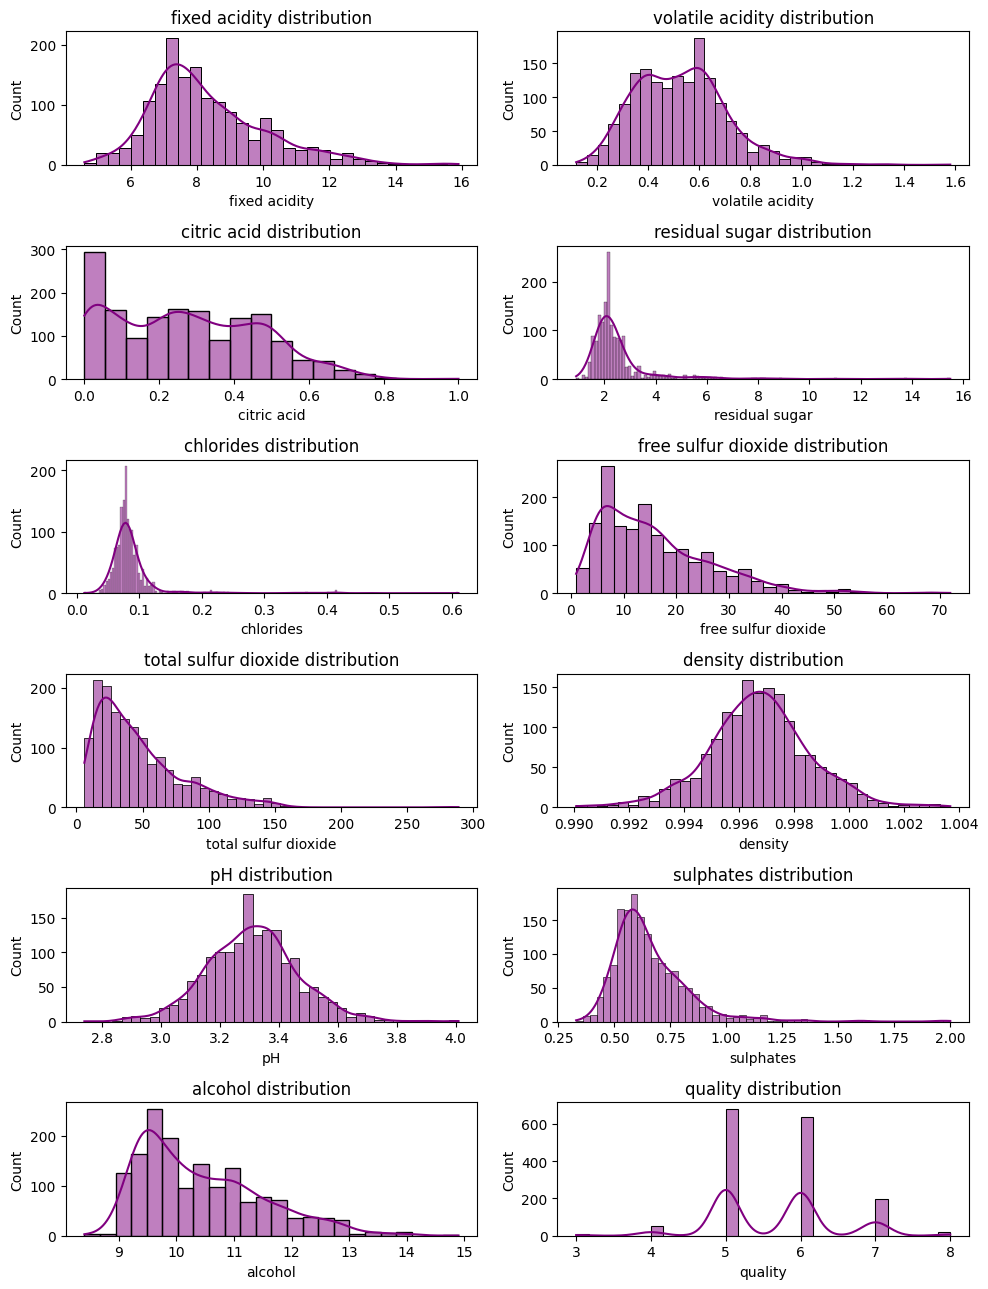

In [10]:
plot_columns=wine_quality.columns
fig,axes=plt.subplots(6,2 ,figsize=(10,13))
axes=axes.flatten()

for i,cols in enumerate(plot_columns):
  sns.histplot(data=wine_quality,x=cols,ax=axes[i],color='purple',kde=True)
  axes[i].set_title(f'{cols} distribution')
plt.tight_layout()
plt.show()



#Splitting Data

In [11]:
y=wine_quality['quality']
x=wine_quality.drop(columns=['quality'])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


#Box plot to visualize outliers

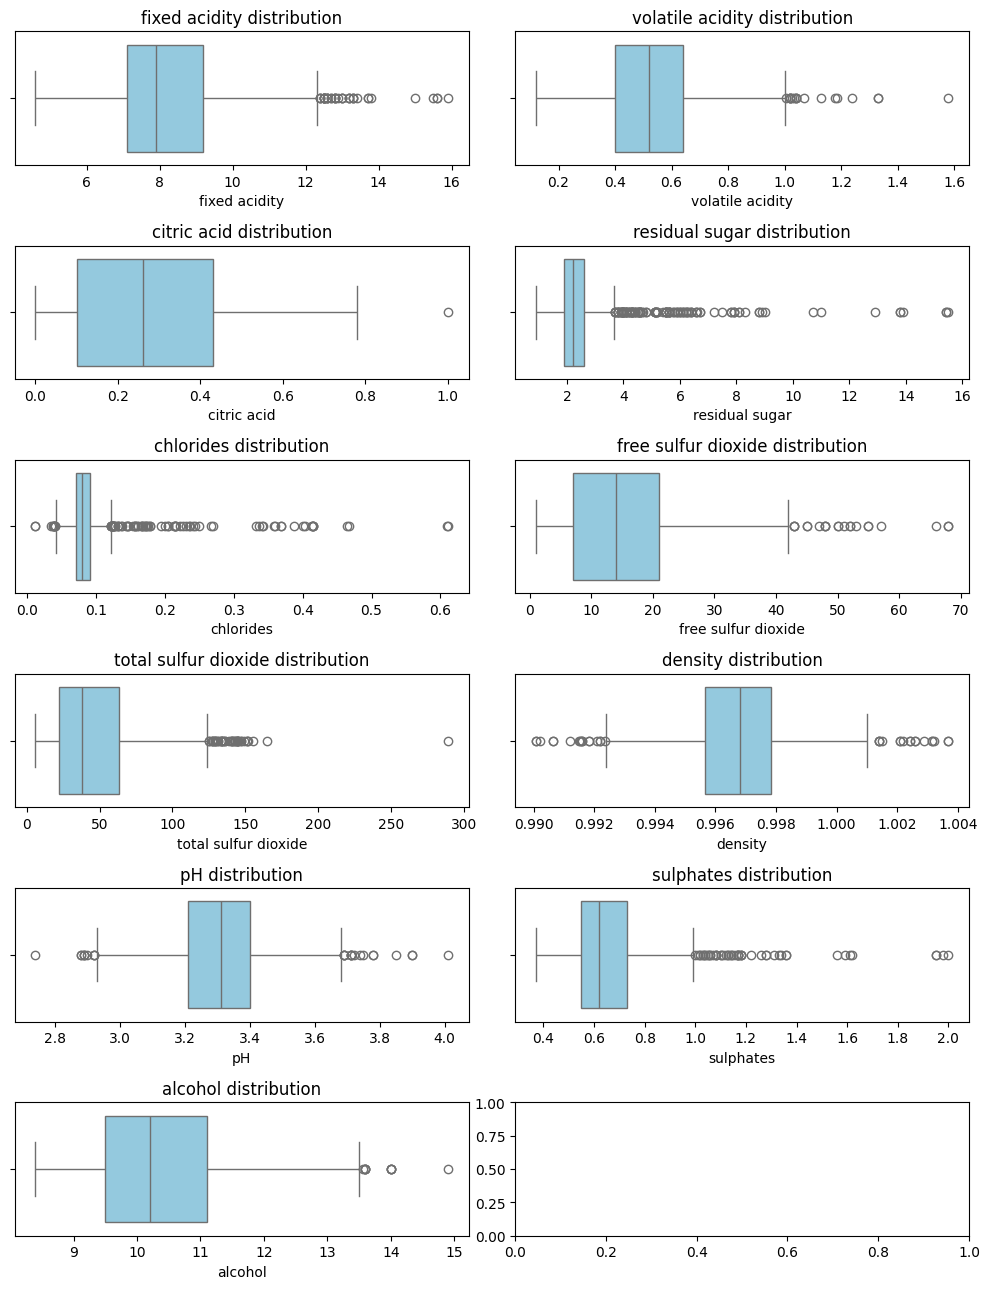

In [14]:
plot_columns=x_train.columns
fig,axes=plt.subplots(6,2 ,figsize=(10,13))
axes=axes.flatten()

for i,cols in enumerate(plot_columns):
  sns.boxplot(data=x_train,x=cols,ax=axes[i],color='skyblue')
  axes[i].set_title(f'{cols} distribution')
plt.tight_layout()
plt.show()



##Handling Outliers using IQR and Clipping
Calculated the lower and upper bounds based on the IQR of the training data. Then used these same bounds to clip the values in both the training and testing sets.

The bounds calculated from the training data is used to clip the test data to prevent data leakage from the test set.

In [15]:
for col in x_train:
  q1 = x_train[col].quantile(0.25)
  q3 = x_train[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  x_train[col] = x_train[col].clip(lower=lower_bound, upper=upper_bound)
  x_test[col] = x_test[col].clip(lower=lower_bound, upper=upper_bound)

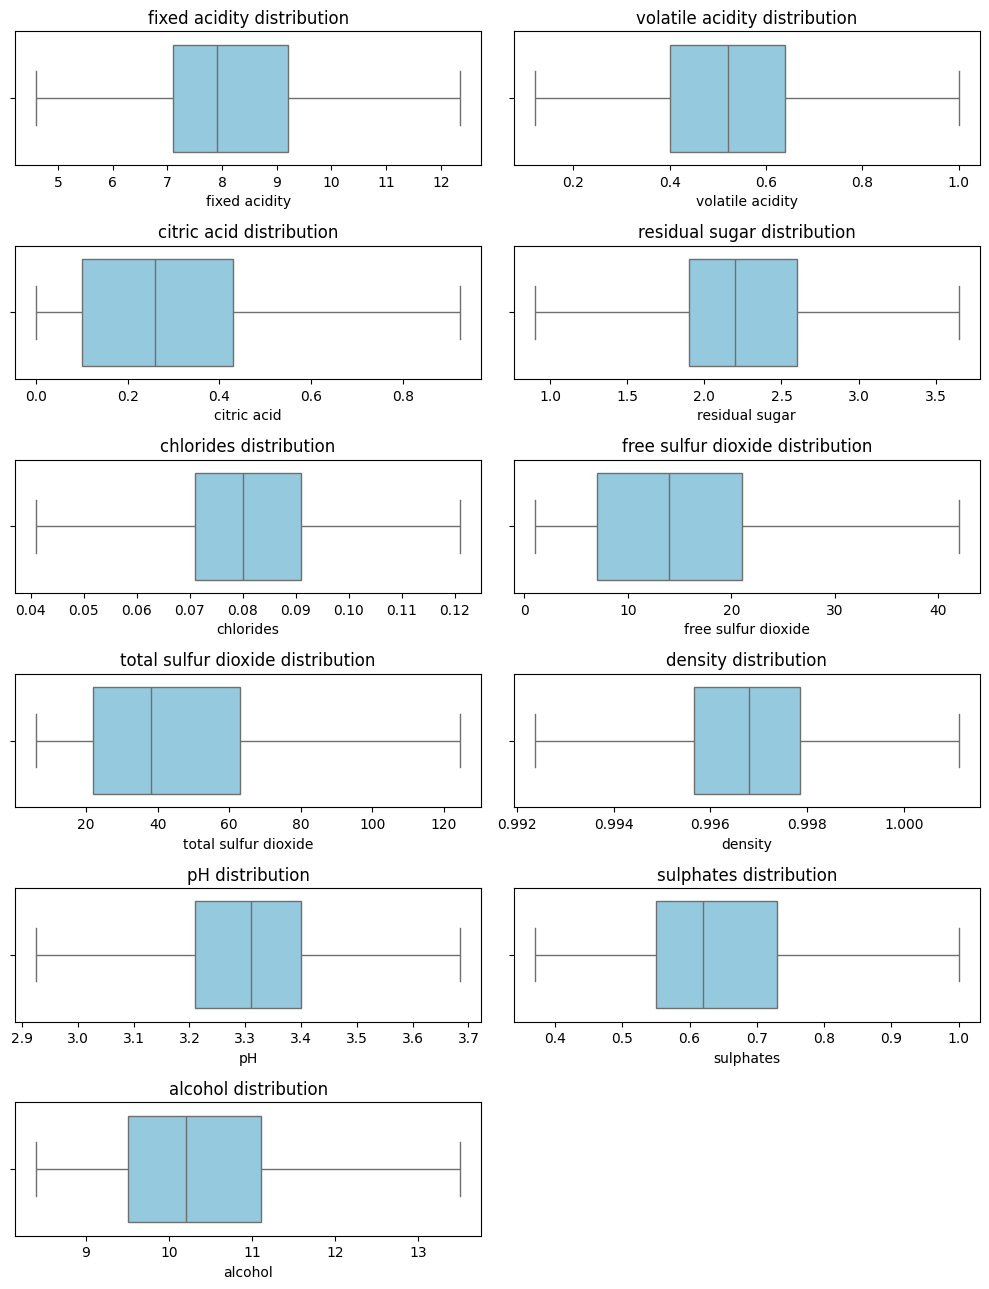

In [16]:
plot_columns=x_train.columns
fig,axes=plt.subplots(6,2 ,figsize=(10,13))
axes=axes.flatten()

for i,cols in enumerate(plot_columns):
  sns.boxplot(data=x_train,x=cols,ax=axes[i],color='skyblue')
  axes[i].set_title(f'{cols} distribution')

for j in range(len(plot_columns),12):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [17]:
x_train.skew()

,0
fixed acidity,0.698970
volatile acidity,0.434073
citric acid,0.304516
residual sugar,0.836936
chlorides,0.447064
free sulfur dioxide,0.844759
total sulfur dioxide,0.990079
density,0.002582
pH,0.071486
sulphates,0.799191


##Handling Skewed Features: Transformation and Scaling
Both transformation and scaling are often necessary preprocessing steps, but they serve different purposes:

Transformation (e.g., log transform): Addresses the shape of the distribution of a single feature, making it more normal-like. This can help models that are sensitive to the assumption of normality or are affected by extreme values.
Scaling (e.g., StandardScaler, MinMaxScaler): Adjusts the range or variance of features so that no single feature dominates the learning process due to its magnitude. This is crucial for distance-based algorithms or those that use gradient descent.
transformation deals with the distribution of individual features, while scaling deals with the range of features relative to each other. Applying both can lead to better model performance by ensuring that features have both a more favorable distribution and a comparable scale.

In [18]:
skewed = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']
for col in skewed:
    x_train[col] = np.log1p(x_train[col])
    x_test[col] = np.log1p(x_test[col])

##Scaling
Scaling all numerical features is a common practice in machine learning, especially when using algorithms that are sensitive to the magnitude of the features. Algorithms like Logistic Regression, K-Nearest Neighbors, and Support Vector Machines, which you might use for classification, calculate distances between data points. If features have vastly different scales, the feature with the largest scale will dominate the distance calculation, effectively making the impact of other features negligible.

By scaling all features to a similar range, it is ensured that each feature contributes more equally to the model's training process, preventing features with larger values from disproportionately influencing the results.

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std_scaler = StandardScaler()
minmaxscaler = MinMaxScaler()


X_train = std_scaler.fit_transform(x_train)
X_test = std_scaler.transform(x_test)

# Convert back to DataFrame to retain column names and use DataFrame methods
X_train = pd.DataFrame(X_train, columns=x.columns)
X_test = pd.DataFrame(X_test, columns=x.columns)

In [20]:
x_train.skew()

,0
fixed acidity,0.698970
volatile acidity,0.434073
citric acid,0.304516
residual sugar,0.457453
chlorides,0.447064
free sulfur dioxide,-0.162632
total sulfur dioxide,-0.096707
density,0.002582
pH,0.071486
sulphates,0.616423


##Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(x_train, y_train)
y_pred = logreg_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.553125
Precision:  0.5295494670219854
Recall:  0.553125
f1 score:  0.5192427602473817


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3, 50)

for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  metric_k.append(acc)

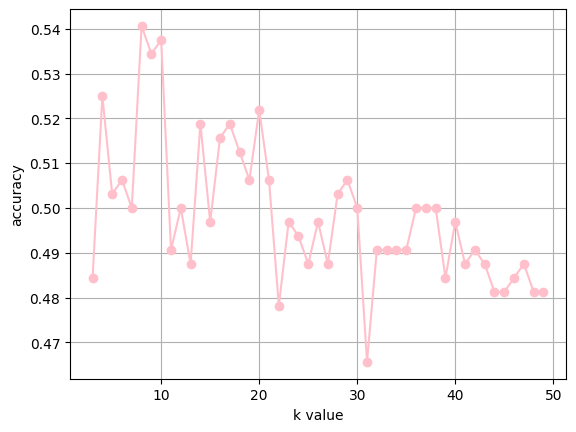

In [24]:
plt.plot(neighbors, metric_k, 'o-',color='pink')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [25]:
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [26]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
print('f1 score: ',f1_score(y_test, y_pred, average='weighted'))

Accuracy:  0.5
Precision:  0.4886630885165285
Recall:  0.5
f1 score:  0.4847271871156211


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
new_data = [
    [7.5, 0.5, 0.3, 2.0, 0.08, 10.0, 40.0, 0.997, 3.4, 0.6, 10.0],
    [8.1, 0.45, 0.4, 2.1, 0.07, 12.0, 35.0, 0.996, 3.3, 0.7, 10.5],
    [6.5, 0.6, 0.1, 1.8, 0.09, 15.0, 50.0, 0.998, 3.5, 0.5, 9.5],
    [9.0, 0.3, 0.5, 2.5, 0.075, 8.0, 30.0, 0.995, 3.2, 0.8, 11.0],
    [7.0, 0.55, 0.2, 1.9, 0.085, 11.0, 45.0, 0.9975, 3.45, 0.65, 10.2],
    [8.5, 0.4, 0.45, 2.2, 0.065, 9.0, 28.0, 0.9965, 3.35, 0.75, 10.8],
    [6.0, 0.7, 0.05, 1.7, 0.1, 20.0, 60.0, 0.999, 3.6, 0.45, 9.0],
    [9.5, 0.25, 0.55, 2.8, 0.06, 7.0, 25.0, 0.9945, 3.1, 0.85, 11.5],
    [7.2, 0.52, 0.25, 2.0, 0.082, 13.0, 42.0, 0.9972, 3.38, 0.62, 10.3],
    [8.8, 0.35, 0.48, 2.3, 0.078, 10.0, 33.0, 0.9955, 3.25, 0.78, 11.3],
    [6.8, 0.65, 0.15, 1.95, 0.095, 18.0, 55.0, 0.9985, 3.55, 0.55, 9.8],
    [9.2, 0.28, 0.52, 2.6, 0.068, 6.0, 20.0, 0.994, 3.05, 0.9, 12.0],
    [7.8, 0.48, 0.35, 2.15, 0.088, 14.0, 48.0, 0.9978, 3.42, 0.68, 10.6],
    [8.0, 0.42, 0.38, 2.05, 0.072, 11.0, 38.0, 0.9968, 3.32, 0.72, 10.9],
    [6.3, 0.68, 0.08, 1.85, 0.098, 22.0, 65.0, 0.9995, 3.65, 0.52, 9.3],
    [9.8, 0.22, 0.58, 3.0, 0.055, 5.0, 18.0, 0.9935, 3.0, 0.95, 12.5],
    [7.6, 0.58, 0.28, 2.0, 0.08, 12.0, 40.0, 0.997, 3.4, 0.6, 10.0],
    [8.3, 0.38, 0.42, 2.2, 0.075, 9.0, 30.0, 0.996, 3.3, 0.7, 10.5],
    [6.6, 0.62, 0.12, 1.9, 0.09, 16.0, 52.0, 0.998, 3.5, 0.55, 9.6],
    [9.1, 0.32, 0.49, 2.4, 0.07, 8.0, 32.0, 0.995, 3.2, 0.8, 11.1]
]


new_data_df = pd.DataFrame(new_data, columns=x.columns)


for col in skewed:
    new_data_df[col] = np.log1p(new_data_df[col])

new_data_scaled = std_scaler.transform(new_data_df)

new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=x.columns)

#Using Logistic Regression
predicted_quality = logreg_model.predict(new_data_scaled_df)

print("Predicted wine quality for the new data: (Logistic Regression)")
for i, quality in enumerate(predicted_quality):
    print(f"Row {i+1}: {quality}")

#using KNeignborsClassifier
predicted_quality = classifier.predict(new_data_scaled_df)

print("Predicted wine quality for the new data: (KNN Classifier)")
for i, quality in enumerate(predicted_quality):
    print(f"Row {i+1}: {quality}")

Predicted wine quality for the new data: (Logistic Regression)
Row 1: 5
Row 2: 7
Row 3: 5
Row 4: 7
Row 5: 5
Row 6: 7
Row 7: 5
Row 8: 7
Row 9: 5
Row 10: 7
Row 11: 5
Row 12: 7
Row 13: 5
Row 14: 7
Row 15: 5
Row 16: 7
Row 17: 5
Row 18: 7
Row 19: 5
Row 20: 7
Predicted wine quality for the new data: (KNN Classifier)
Row 1: 7
Row 2: 7
Row 3: 7
Row 4: 7
Row 5: 7
Row 6: 7
Row 7: 4
Row 8: 5
Row 9: 7
Row 10: 7
Row 11: 7
Row 12: 7
Row 13: 7
Row 14: 7
Row 15: 7
Row 16: 6
Row 17: 7
Row 18: 7
Row 19: 7
Row 20: 7
